In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.3533 - loss: 1.7502 - val_accuracy: 0.5380 - val_loss: 1.2716
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.5598 - loss: 1.2322 - val_accuracy: 0.5982 - val_loss: 1.1283
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6306 - loss: 1.0493 - val_accuracy: 0.6170 - val_loss: 1.0944
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6660 - loss: 0.9419 - val_accuracy: 0.6462 - val_loss: 0.9970
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7011 - loss: 0.8509 - val_accuracy: 0.6685 - val_loss: 0.9364
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7198 - loss: 0.7966 - val_accuracy: 0.6953 - val_loss: 0.8857
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.7461 - loss: 0.7260 - val_accuracy: 0.6932 - val_loss: 0.8869
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7575 -

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - 8ms/step - accuracy: 0.7059 - loss: 0.8899
Test accuracy: 0.7059000134468079


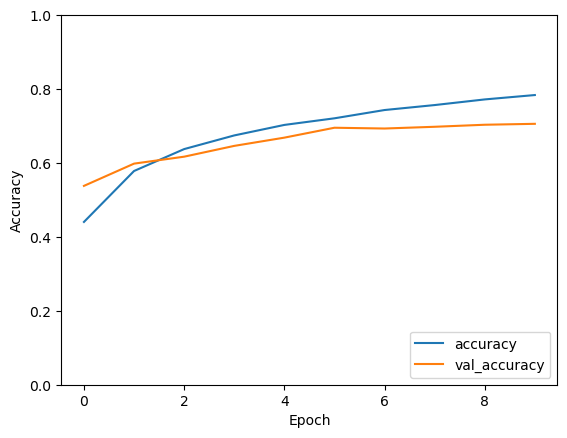

In [6]:
# Plot training and validation accuracy/loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
